In [1]:
%reload_ext autoreload
%autoreload 2

%reload_ext autoreload
%autoreload 2
import sys; sys.path.append('..')
from src.data_utils import get_dataset_imagenet, imagenet_classes
from jupyter_preproc import smoothen, probs_to_softacc
import numpy as np
import time
import matplotlib.pyplot as plt
rng = np.random.default_rng(5)
import seaborn as sns
import matplotlib as mpl
from plot_utils import stacksimple

from scipy.stats import norm
import scipy
ppf = norm.ppf
cdf = norm.cdf

In [3]:
v2_npz_path = '/home/jupyter/processed/imagenet/resnet50/resnet50_imagenet_v2.npz'
v2_scores_path = '/home/jupyter/dist-shift/scores/imagenet/resnet50/resnet50_imagenet_v2_scores.npz'

data_v2 = np.load(v2_npz_path, mmap_mode='r')
scores_v2 = np.load(v2_scores_path, mmap_mode='r')

gname = 'imagenet_v2'
dataset = get_dataset_imagenet(gname)
ytest = dataset.targets
classes = imagenet_classes


In [250]:
# fit linear model in probit domain

xx = ppf(data_v2['x'])
yy = ppf(data_v2['all_acc'])
p = np.poly1d(np.polyfit(xx,yy, 1))

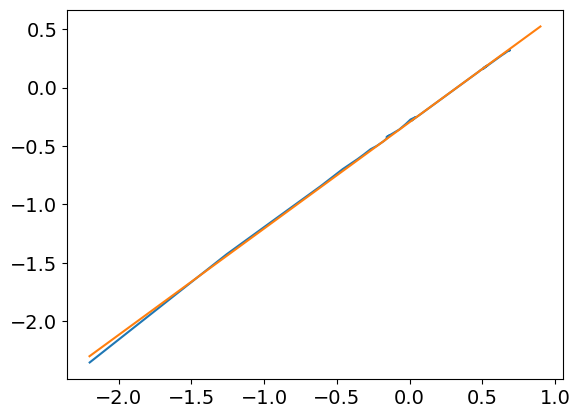

In [255]:
# the fit is nice

plt.plot(xx, yy)
xs = np.linspace(-2.2, 0.9)
ys = p(xs)
plt.plot(xs, ys)

In [311]:
def loss(s):
    return np.exp(np.abs(s))

def transform(t):
    return cdf(p(ppf(t)))

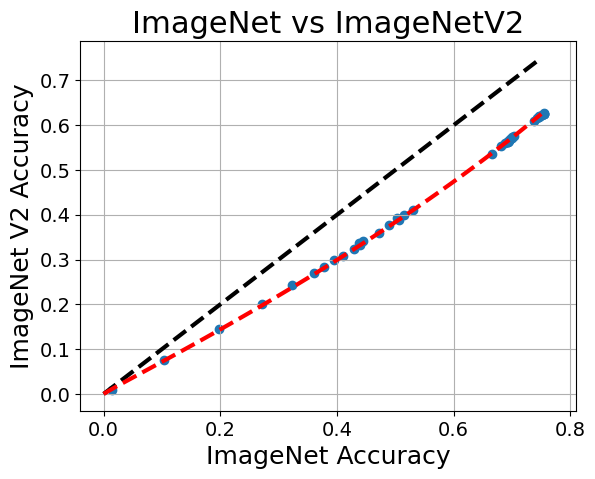

In [257]:
plt.style.use('default')

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.scatter(data_v2['x'], data_v2['all_acc'], color='tab:blue')
plt.plot(np.linspace(0, 0.75, 40), np.linspace(0, 0.75, 40), '--', color='black', linewidth=3)
plt.plot(np.linspace(0, 0.75, 40), cdf(p(ppf(np.linspace(0.0001, 0.75, 40)))), '--', color='red', linewidth=3)

plt.gcf().axes[0].set_title(f'ImageNet vs ImageNetV2', fontsize=22)
plt.xlabel('ImageNet Accuracy')
plt.ylabel(f'ImageNet V2 Accuracy')
plt.grid(True)

plt.xlim(-0.04, 0.81)

plt.savefig('figures/intro_first1.pdf', dpi=100,
        bbox_inches='tight')


# plt.legend()
plt.show()

In [323]:
z = np.copy(data_v2['labels'])
x = data_v2['x']
yfit = transform(x)
np.sum(loss((z - yfit[None, :])), axis=1).argsort()[:10]

array([443, 561, 897, 557, 553, 444, 751, 653, 829, 887])

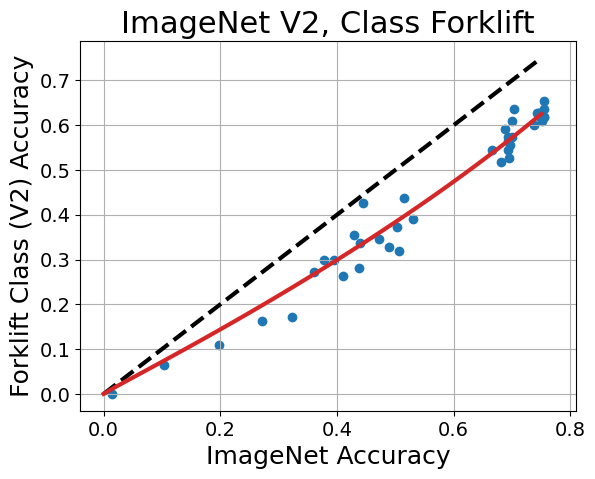

In [301]:
plt.style.use('default')
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

i = 561
plt.scatter(data_v2['x'], data_v2['labels'][i], color='tab:blue')
plt.plot(np.linspace(0, 0.75, 40), np.linspace(0, 0.75, 40), '--', color='black', linewidth=3)

plt.plot(np.linspace(0, 0.75, 40), y, color='tab:red', linewidth=3)
plt.gcf().axes[0].set_title(f'ImageNet V2, Class {classes[i].capitalize()}', fontsize=22)
plt.xlabel('ImageNet Accuracy')
plt.ylabel(f'{classes[i].capitalize()} Class (V2) Accuracy')
plt.grid(True)

plt.xlim(-0.04, 0.81)

plt.savefig('figures/intro_first2.pdf', dpi=100,
        bbox_inches='tight')


plt.show()

In [330]:
label_class_soft_max = data_v2['probs'][np.arange(10000), np.array(dataset.targets)]

In [331]:
z = label_class_soft_max
x = data_v2['x']
yfit = transform(x)
print(np.sum(loss((z - yfit[None, :])), axis=1).argsort()[:10])

[ 721 6205 3044 4601  666 3467 5086 6700 5248 2407]


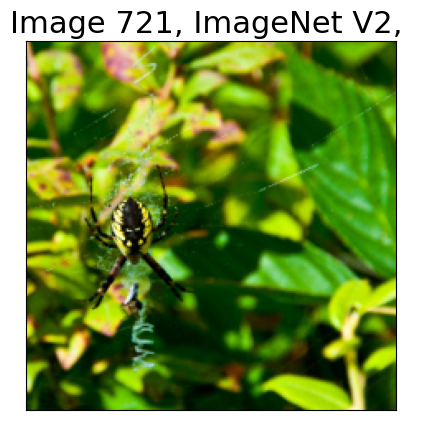

In [332]:
i = 721
plt.xticks([])
plt.yticks([])
plt.imshow(dataset[i][0])
plt.gcf().axes[0].set_title(f'Image {i}, ImageNet V2, ', fontsize=22)
plt.savefig('figures/intro_first_image.pdf', dpi=100, bbox_inches='tight')

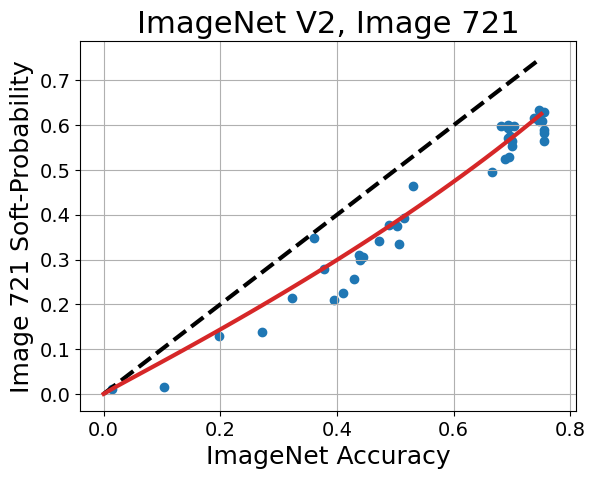

In [334]:

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.scatter(data_v2['x'], label_class_soft_max[i], color='tab:blue')
plt.plot(np.linspace(0, 0.75, 40), np.linspace(0, 0.75, 40), '--', color='black', linewidth=3)
# plt.plot(x, y, color='tab:red', linewidth=3)
plt.plot(np.linspace(0, 0.75, 40), y, color='tab:red', linewidth=3)
plt.gcf().axes[0].set_title(f'ImageNet V2, Image {i}', fontsize=22)
plt.xlabel('ImageNet Accuracy')
plt.ylabel(f'Image {i} Soft-Probability')
plt.grid(True)

plt.xlim(-0.04, 0.81)

plt.savefig('figures/intro_first3.pdf', dpi=100,
        bbox_inches='tight')


# plt.legend()
plt.show()